In [ ]:
!pip install skimage.metrics
!pip install imutil

ERROR: Could not find a version that satisfies the requirement skimage.metrics (from versions: none)
ERROR: No matching distribution found for skimage.metrics
     |████████████████████████████████| 208 kB 8.8 MB/s 


In [2]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [3]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [4]:
original=Image.open(requests.get('https://images.moneycontrol.com/static-mcnews/2018/06/A_sample_of_Permanent_Account_Number_PAN_Card_1280x720-770x433.jpg',stream=True).raw)
tampered=Image.open(requests.get('https://5.imimg.com/data5/SELLER/Default/2020/8/IE/RI/XN/680564/pan-pre-printed-pan-card-500x500-500x500.jpg',stream=True).raw)

In [5]:
print("Orig Img format:",original.format)
print("Tampered Img format:",tampered.format)

print("Orig Img Size:",original.size)
print("Tampered Size:",tampered.size)

Orig Img format: JPEG
Tampered Img format: JPEG
Orig Img Size: (770, 433)
Tampered Size: (500, 312)


In [6]:
original=original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')

tampered=tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


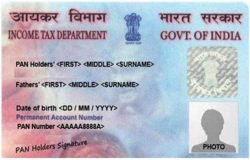

In [7]:
original

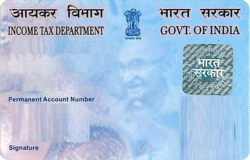

In [8]:
tampered

In [9]:
original=cv2.imread('pan_card_tampering/image/original.png')
tampered=cv2.imread('pan_card_tampering/image/tampered.png')

In [10]:
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [11]:
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff *255).astype("uint8")
print("SSIM: {}".format(score))


SSIM: 0.28030448968078286


In [12]:
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

In [13]:
for c in cnts:
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Original Image Format:


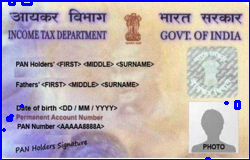

In [16]:
print("Original Image Format:")
Image.fromarray(original)

Tampered Image Format:


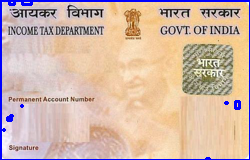

In [17]:
print("Tampered Image Format:")
Image.fromarray(tampered)

Different Image


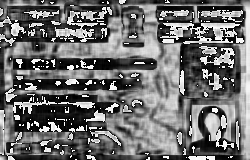

In [19]:
print("Different Image")
Image.fromarray(diff)

Threshold Image


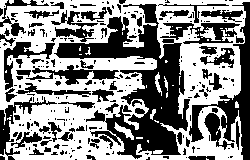

In [20]:
print("Threshold Image")
Image.fromarray(thresh)